#### Setup & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [2]:
df = pd.read_csv('../data_extraction/csv_files/income_statistics.csv')

# preview dataset
df.head()

,Region,AgeVariable,Year,AvgDisposibleIncome
0,Upplands Väsby,all 20-64 years of age,1997,4.0
1,Upplands Väsby,all 20-64 years of age,1998,4.1
2,Upplands Väsby,all 20-64 years of age,1999,4.4
3,Upplands Väsby,all 20-64 years of age,2000,5.3
4,Upplands Väsby,all 20-64 years of age,2001,5.0


#### Data Overview

In [3]:
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (46980, 4)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46980 entries, 0 to 46979
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               46980 non-null  object 
 1   AgeVariable          46980 non-null  object 
 2   Year                 46980 non-null  int64  
 3   AvgDisposibleIncome  46944 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year,AvgDisposibleIncome
count,46980.000000,46944.00000
mean,2010.000000,4.95196
std,7.788964,1.47798
min,1997.000000,1.90000
25%,2003.000000,4.00000
50%,2010.000000,4.90000
75%,2017.000000,5.80000
max,2023.000000,34.10000


In [6]:
df.isnull().sum()

Region                  0
AgeVariable             0
Year                    0
AvgDisposibleIncome    36
dtype: int64

In [7]:
df.nunique()

Region                 290
AgeVariable              6
Year                    27
AvgDisposibleIncome    172
dtype: int64

### Data Cleaning

In [8]:
# View rows where AvgDisposableIncome is null
null_income_rows = df[df['AvgDisposibleIncome'].isnull()]

# Display all
null_income_rows

,Region,AgeVariable,Year,AvgDisposibleIncome
1944,Nykvarn,all 20-64 years of age,1997,NaN
1971,Nykvarn,20-24 years,1997,NaN
1998,Nykvarn,age 25-34 years,1997,NaN
2025,Nykvarn,age 35-44 years,1997,NaN
2052,Nykvarn,age 45-54 years,1997,NaN
2079,Nykvarn,age 55-64 years,1997,NaN
4536,Knivsta,all 20-64 years of age,1997,NaN
4537,Knivsta,all 20-64 years of age,1998,NaN
4538,Knivsta,all 20-64 years of age,1999,NaN
4539,Knivsta,all 20-64 years of age,2000,NaN


In [9]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [10]:
# Drop rows with null AvgDisposibleIncome
df = df.dropna(subset=['AvgDisposibleIncome'])

In [11]:
df.reset_index(drop=True)


,Region,AgeVariable,Year,AvgDisposibleIncome
0,Upplands Väsby,all 20-64 years of age,1997,4.0
1,Upplands Väsby,all 20-64 years of age,1998,4.1
2,Upplands Väsby,all 20-64 years of age,1999,4.4
3,Upplands Väsby,all 20-64 years of age,2000,5.3
4,Upplands Väsby,all 20-64 years of age,2001,5.0
...,...,...,...,...
46939,Kiruna,age 55-64 years,2019,6.9
46940,Kiruna,age 55-64 years,2020,7.2
46941,Kiruna,age 55-64 years,2021,7.6
46942,Kiruna,age 55-64 years,2022,7.5


In [12]:
# Rename columns for consistency
df.columns = ['region', 'age_breakdown', 'year', 'avg_disposable_income']


#### Descriptive Analysis

In [13]:
df1 = df[(df['age_breakdown']=='all 20-64 years of age') & (df['region'] =='Stockholm')]
df2 = df[(df['age_breakdown']=='all 20-64 years of age') & (df['region'] =='Malmö')]
df3 = df[(df['age_breakdown']=='all 20-64 years of age') & (df['region'] =='Göteborg')]

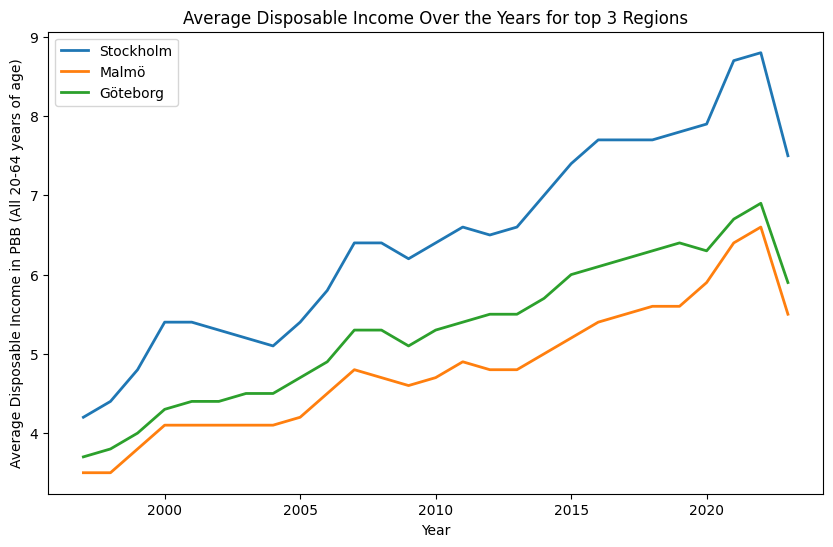

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df1['year'], df1['avg_disposable_income'], linewidth=2.0, label='Stockholm')
ax.plot(df2['year'], df2['avg_disposable_income'], linewidth=2.0, label='Malmö')
ax.plot(df3['year'], df3['avg_disposable_income'], linewidth=2.0, label='Göteborg')

# Add labels and a title for clarity
ax.set_xlabel('Year')
ax.set_ylabel('Average Disposable Income in PBB (All 20-64 years of age)')
ax.set_title('Average Disposable Income Over the Years for top 3 Regions')

# Add a legend with a specific location
ax.legend(loc='upper left')


In [15]:
latest_year = df['year'].max()
top_regions = df[df['year'] == latest_year] \
                .groupby('region')['avg_disposable_income'] \
                .mean().sort_values(ascending=False).head(10)


In [16]:
top_regions

region
Danderyd      14.300000
Lidingö        9.866667
Täby           8.183333
Nacka          8.100000
Vellinge       8.050000
Lomma          7.966667
Vaxholm        7.616667
Ekerö          7.450000
Stockholm      7.150000
Sollentuna     7.100000
Name: avg_disposable_income, dtype: float64

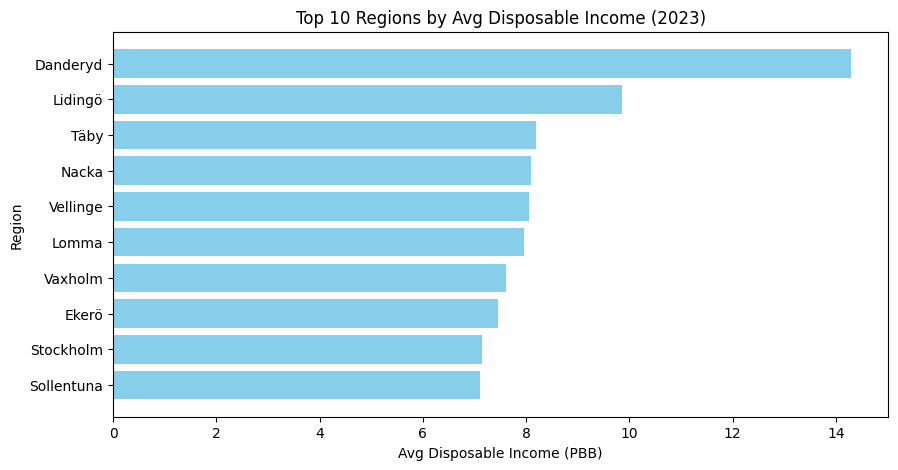

In [17]:
plt.figure(figsize=(10,5))
plt.barh(top_regions.index, top_regions.values, color='skyblue')
plt.xlabel('Avg Disposable Income (PBB)')
plt.ylabel('Region')
plt.title(f'Top 10 Regions by Avg Disposable Income ({latest_year})')
plt.gca().invert_yaxis()  # so highest is at the top
plt.show()

/var/folders/tg/1ywxq6y562945l7bh_1btpmw0000gn/T/ipykernel_20896/3125722190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="age_breakdown", y="avg_disposable_income", estimator="mean", palette="viridis")


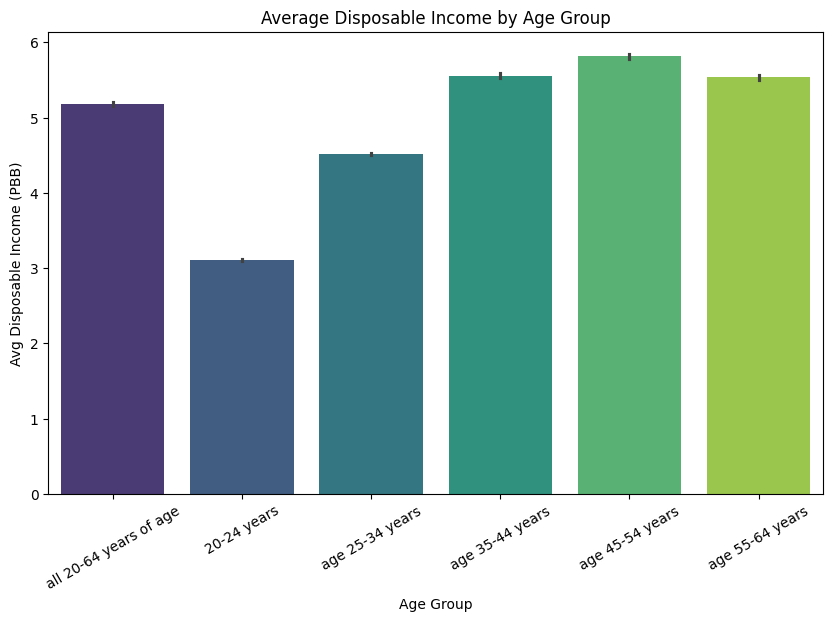

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="age_breakdown", y="avg_disposable_income", estimator="mean", palette="viridis")
plt.xticks(rotation=30)
plt.xlabel("Age Group")
plt.ylabel("Avg Disposable Income (PBB)")
plt.title("Average Disposable Income by Age Group")
plt.show()

#### Save Dataframe

In [20]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('csv_files/clean_income_statistics.csv', index=False)